# Sect 17: Bayesian Statistics

- online-ds-pt-041320
- 07/08/2020 study group

## Learning Objectives

- Review the concept of conditional probability 
- Learn about Bayes' Theorem
- Apply Bayes Theorem - Bayes' Theorem Lab
- Discuss maximum likelihood estimation (MLE)
- Apply Maximum Likelihood Estimation using a normal distribution

## Additional References

- **Videos**
    - [Bayesian Stats & MLE YouTube Playlist](https://www.youtube.com/playlist?list=PLFknVelSJiSxKhi_xJIbBUZdIn49hDajE)


- **Blog Posts & Articles**
    - https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
    - [Star Wars Intro To Bayesian Priors](https://www.countbayesie.com/blog/2015/2/18/hans-solo-and-bayesian-priors)


## Advice on Approaching This Section


- Don't let the Monty Hall Problem lab slow you down.
- Don't fret too much about the math behind the MLE section (for now). 
    - If you understand what we do in today's class, that is a better starting point than the lessons
    
- When we get to calculus & gradient descent we will come back and discuss more of the math from the lessons about MLE/MAP

## Questions?
- 
- 

# Conditional Probability - Review


**Conditional probability emerges when the outcome a trial may influence the results of the upcoming trials.**

The conditional probability (Probability of $A$ **given** $B$) can be written as:
$$ P (A \mid B) = \dfrac{P(A \cap B)}{P(B)}$$



$P(A|B)$, is the probability A **given** that $B$ has just happened. 


## Laws & Theorems Based on Conditional Probability


### Theorem 1: Product Rule

The intersection of events $A$ and $B$ can be given by

\begin{align}
    P(A \cap B) = P(B) P(A \mid B) = P(A) P(B \mid A)
\end{align}



### Theorem 2: Chain Rule AKA "General Product Rule"

- Allows calculation of any member of the join distribution of a set of random variables using _only_ conditional probabilities.

- Built on the product rule: 
$$P(A \cap B) = P(A \mid B) P(B)$$





# Bayes' Theorem

- Starts with the formula for conditional probability/likelihood:

$$ P(A|B) = \dfrac{P(A \cap B)}{P(B)}$$

- Substitute $P(B|A)P(A)$ for $P(A \cap B)$ using the product rule and we get:



#### Bayes' Theorem

$$ \large P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


- Note that, using Bayes theorem, you can compute conditional probabilities without explicitly needing to know $P(A \cap B)$! 

# Activity: Bayes' Theorem - lab

In [5]:
# ! pip install -U fsds
from fsds.imports import *

In [6]:
def bayes(P_a, P_b, P_b_given_a):
    # Your code here

    return P_a_given_b

### Skin Cancer

After a physical exam, a doctor observes a blemish on a client's arm. The doctor is concerned that the blemish could be cancerous, but tells the patient to be calm and that it's probably benign. Of those with skin cancer, 100% have such blemishes. However, 20% of those without skin cancer also have such blemishes. If 15% of the population has skin cancer, **what's the probability that this patient has skin cancer?**

> Hint: Be sure to calculate the overall rate of blemishes across the entire population.


$$ \large P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


- Must apply the Law of Total Probability to get P_blemish


In [7]:
# Your code here 


### Children (I) 
 
A couple has two children, the older of which is a boy. What is the probability that they have two boys?

In [8]:
# Your solution P(2boys|older child is a boy)


### Children  (II)

A couple has two children, one of which is a boy. What is the probability that they have two boys?

In [9]:
# Your solution P(2boys|1 of 2 children is a boy)


### A diagnostic test


A diagnostic test is advertised as being 99% accurate 

* If a patient has the disease, they  will test positive 99% of the time 

* If they don't have the disease, they will test negative 99% of the time  

* 1% of all people have this disease 

If a patient tests positive, what is the probability that they actually have the disease?

# Maximum Likelihood Estimation


MLE primarily deals with **determining the parameters ($\theta$'s)** that **maximize the probability/liklihood of observing the data**. 

## Parameter Inference

> - If we have a number of observations for a phenomenon that we do not know the probability/parameters for, we can use the probability of seeing those observations (the likelihood) for different probabilities/parameters until we find the value for the parameter that maximizes our chances of seeing the observed data.'


### MLE Assumptions

- Observations are independent 
- Observations are identically distributed


> These assumptions are so common they have been given an abbreviation: "the i.i.d. assumption (independent and identically distributed samples)

<!---<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-mle-online-ds-pt-100719/master/images/der.png">--->

# Activity: Using MLE to find the Mean and Std for Male Height

> Use MLE to find find the mean height and standard deviation for males.

In [10]:
df = fs.datasets.load_height_weight()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [11]:
## Separate Out Males' height
df_male = df.groupby('Gender').get_group("Male")['Height']

## Take a small sample (n=100) using random_state 123
male_sample = df_male.sample(100, random_state=123)
male_sample

2648    69.569235
2456    68.035724
4557    65.102935
4884    64.585263
92      70.640530
          ...    
1182    74.758752
1898    72.439501
2736    68.929542
1003    67.805312
3022    68.914623
Name: Height, Length: 100, dtype: float64

[Text(0.5, 0, 'Height (inches)'), Text(0.5, 1.0, 'Observed Male Heights')]

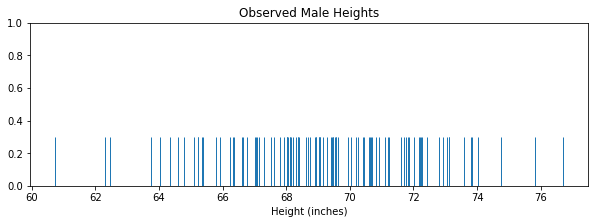

In [12]:
## Rug Plot of Male Heights Sample
fig,ax=plt.subplots(figsize=(10,3))
ax = sns.rugplot(male_sample,ax=ax,height=0.3)
ax.set(title='Observed Male Heights', 
       xlabel='Height (inches)')

## Task: Use MLE to Determine the Most Likely Mean and Std of Male Height

- How can we figure out the most likely population mean and std for males?

In [13]:
import scipy.stats as st
mu=60
std=2

In [14]:
## Generate 100 data points in the range of male_height (xs)
xs = np.linspace(male_sample.min(),male_sample.max(),100)

## Generate a normal distribution (ys) using the xs 
ys = st.norm(loc=mu,scale=std).pdf(xs)

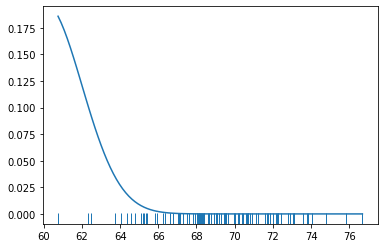

In [15]:
## PLot the male_sample rugplot with the nromal distrubition
plt.plot(xs,ys)
sns.rugplot(male_sample)

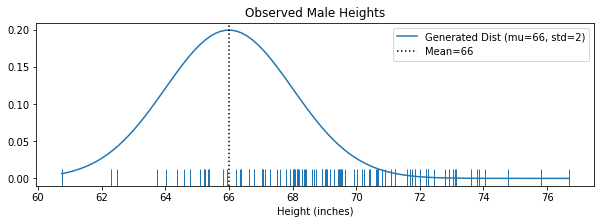

In [16]:
def plot_male_height(male_sample, mu, std):
    """Plot a rugplot of the male_sample 
    vs the normal distribution defined by mu and std."""

    ## Plot Male Heights
    fig,ax=plt.subplots(figsize=(10,3))
    ax = sns.rugplot(male_sample,ax=ax,height=0.1)
    ax.set(title='Observed Male Heights', xlabel='Height (inches)')
    
    ## Generate a normal distribution (ys) using the xs 
    xs = np.linspace(male_sample.min(),male_sample.max(),100)
    pop = st.norm(loc=mu,scale=std).pdf(xs)
    
    ax.plot(xs,pop,label=f"Generated Dist (mu={mu}, std={std})")
    ax.axvline(mu,c='k',ls=':',label=f"Mean={mu}")
    ax.legend()
plot_male_height(male_sample,66,2)    

## The Probability Density Function for the Normal Distribution

https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f

The probability density function equation for the normal distribution is given by the following expression:

$$ \large P(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $

> https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-12-statistical-distributions/the-normal-distribution

In [ ]:
import math
import numpy as np

def calc_likelihood(x,mu,std):
    """Write a function to calculate the expected value at 
    a particular point using the equation above."""
    pass


def calc_total_likelihood(xs,mu,std):
    """Write a function that will get the likelihood 
    for each x value so we can get the product of the total probability"""
    pass

In [ ]:
## Parameter Inference
## We want to infer which of these values best matches the true Mean and Std of male height
import itertools
theta_mus = []
theta_stds = []

theta_params = list(itertools.product(theta_mus,theta_stds))
theta_params[:5]

In [ ]:
## Calculate the most likely parameters for mu, std
compare_likelihoods = [['Mu', "Std",'Likelihood']]

## For each pair of mu,std, calculate total likelihood.


## Turn it into a df for convenience



In [ ]:
## View the 5 params with the highest likelihood

In [ ]:
## Plot the male_sample rugplot vs mu and std with the max likelihood
plot_male_height()

In [ ]:
## Get the actual mean and std from the full population
df_male.mean(), df_male.std()

# Appendix



### Monotonic function

> In mathematics, a [monotonic function](https://en.wikipedia.org/wiki/Monotonic_function) (or monotone function) is a function between ordered sets that preserves or reverses the given order. This concept first arose in calculus, and was later generalized to the more abstract setting of order theory. 


According to this theory, if you apply a monotonic function to another function, like the one you are trying to optimize above, this application will preserve the critical points (maxima in this case) of the original function. Logarithmic functions are normally used within the domain of machine learning to achieve the functionality of monotonicity. The logarithmic function is described as:

> $log_b(x)$

* where b is any number such that b > 0, b ≠ 1, and x > 0  
* The function is read "log base b of x" 

The logarithm y is the exponent to which b must be raised to get x. The behavior of a log function can be understood from following image.


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mle-online-ds-pt-100719/master/images/new_log.png" width="700">


This helps you realize that **log of f(θ) i.e. log(f(θ)) will have the save maxima as the likelihood function f(θ).** This is better known as the **log likelihood**. 
